#### Imports 

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import time
import datetime
import numpy as np

import matplotlib.pyplot as plt

def plot_image(image, factor=1):
    """<
    Utility function for plotting RGB images.
    """
    fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
    
    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)    

In [2]:
from sentinelhub import SentinelhubClient, MimeType, CRS, SentinelHubRequest, SHOutput, SHBounds, SHData

evalscript = """
    function setup() {
        return {
            input: ["B02", "B03", "B04"],
            output: { bands: 3 }
        };
    }

    function evaluatePixel(sample) {
        return [2.5 * sample.B04, 2.5 * sample.B03, 2.5 * sample.B02];
    }
"""

def get_images():
    sh_request = SentinelHubRequest(
         bounds=SHBounds(crs=CRS.WGS84.opengis_string, bbox=[46.16, -16.15, 46.51, -15.58]),
         data=[SHData(data_type='S2L1C')],
         output=SHOutput(size_x=512, size_y=856, image_format=MimeType.TIFF),
         evalscript=evalscript
    )
    client = SentinelhubClient()    
    return client.get_time_range(sh_request, time_range=('2017-12-15', '2017-12-30'))

In [3]:
start_time = time.time()
images = get_images()
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.96244215965271 seconds ---


In [4]:
len(images)

4

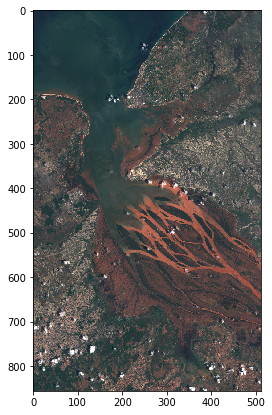

In [5]:
plot_image(images[3])